In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Problem Statement -: We need to predict whether a passenger survived or not based on few other varibales</strong>

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<h3>Information About Columns-:</h3>
<ul>
    <li>PassengerId || Unique || Id of the passenger || (To de dropped)</li>
    <li>Survived || Outcome Variable || Whether the passenger surviuved or not || Binary</li>
    <li>Pclass || Class of Passenger || Categorical </li>
    <li>Name || Name of Passenger || Unique || (To be dropped)</li>
    <li>Sex || Gender of Passenger || Binary</li>
    <li>Sibsp || Categorical </li>
    <li>Parch || Categorical </li>
    <li>Ticket || Unique || (To be dropped)</li>
    <li>Fare || Continuos || Fare given by Passenger</li>
    <li>Cabin || Cabin of Passenger || (To be dropped)</li>
    <li>Embark || Port of Ebmarkmet of Passenger || Categorical </li>
</ul>

<h3>Dropping a few Column</h3>

In [6]:
data = data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<h3>Exploratory Data Analysis</h3>

<h4>Stripplots</h4>

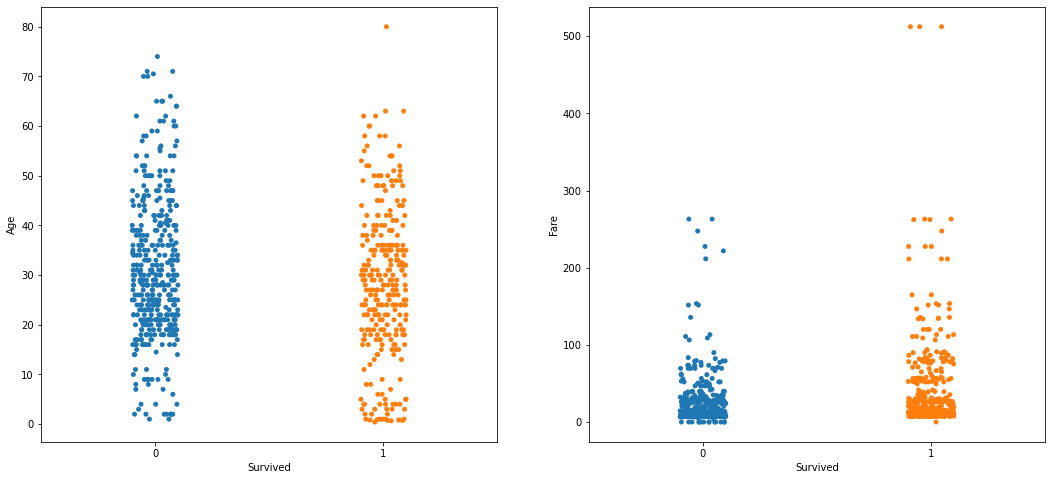

In [8]:
num_cols = ['Age', 'Fare']
plt.figure(figsize=(18,8))
plotnumber= 1
for col in num_cols:
    plt.subplot(1,2, plotnumber)
    sns.stripplot(x='Survived', y=col, data=data)
    plotnumber+=1
    

<strong>High age customers has slighlty less chance of survival <br> High fare customers have high chance of survival</strong>

<h4>Countplots</h4>

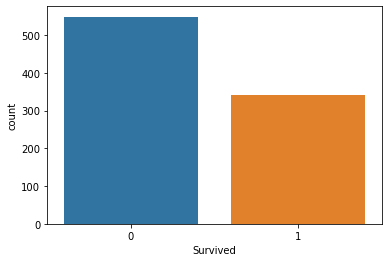

In [11]:
sns.countplot(data['Survived'])

In [9]:
data_survived = data[data['Survived'] == 1]
data_ns = data[data['Survived'] == 0]

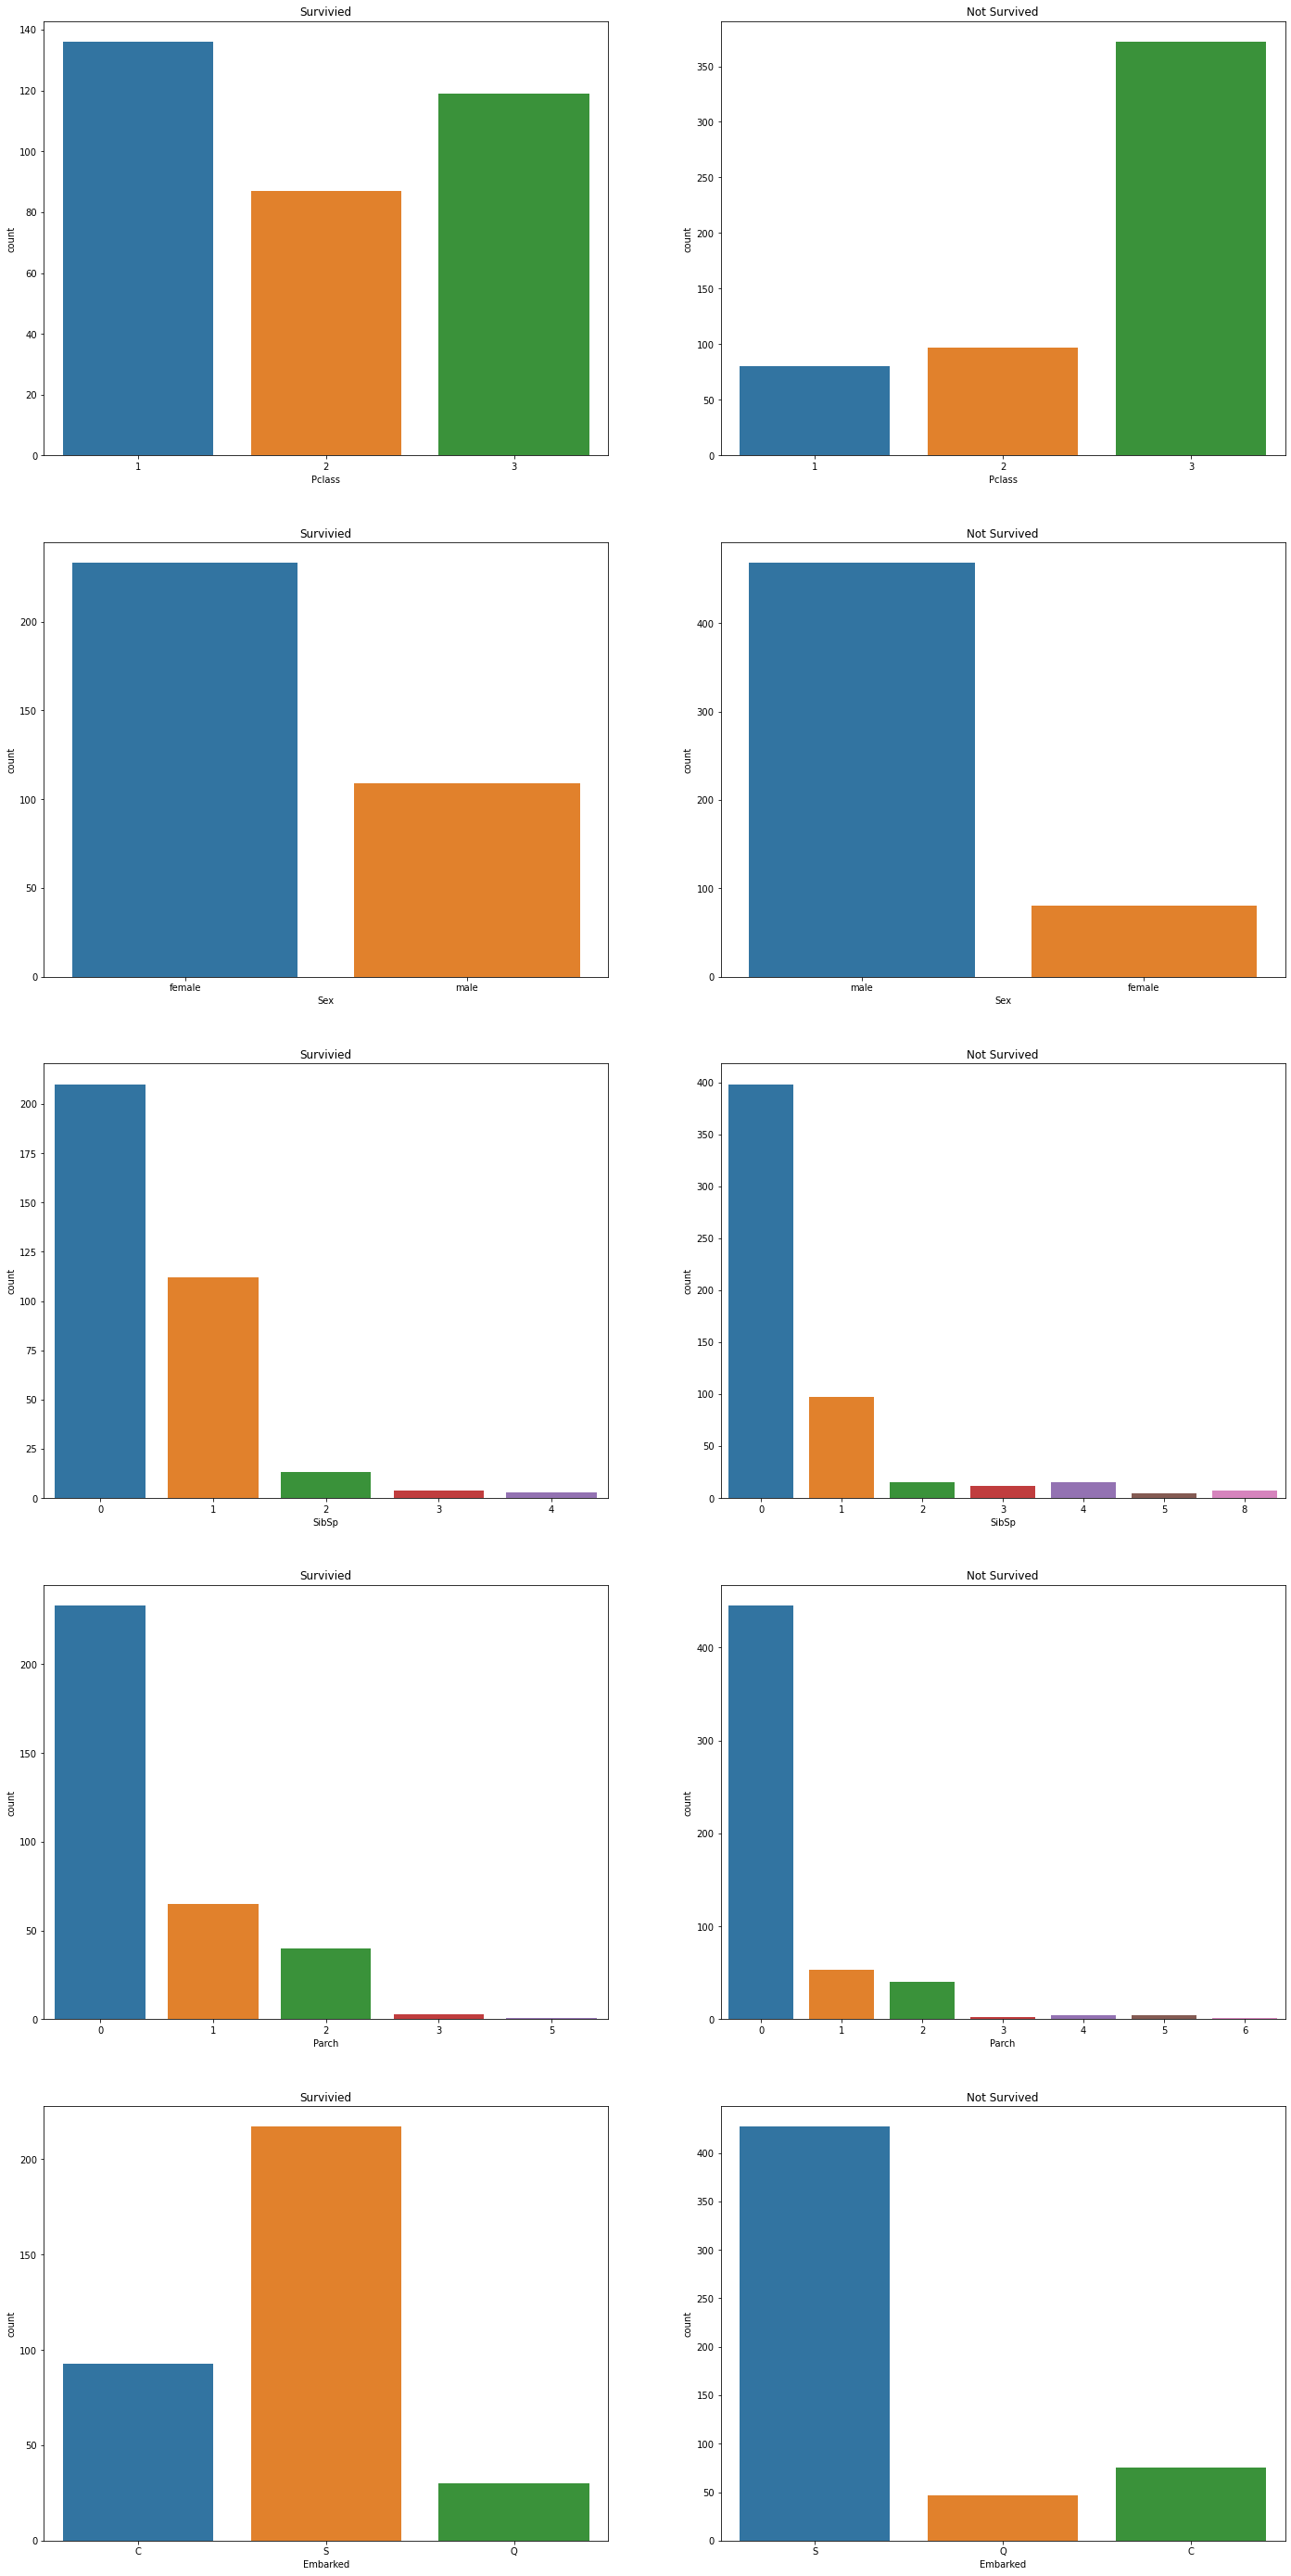

In [10]:
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(24, 50))
plotnumber = 1
for col in cat_cols:
    plt.subplot(5,2,plotnumber)
    sns.countplot(data_survived[col])
    plt.title('Survivied')
    plotnumber+=1
    plt.subplot(5,2,plotnumber)
    sns.countplot(data_ns[col])
    plotnumber+=1
    plt.title('Not Survived')

<ul><strong>
    <li>Class 1 passengers have high chance of survival</li>
    <li>Class 3 passngers have low chance of survival</li>
    <li>Female passengers have high chance of survival</li>
    <li>Male passengers have low chances of sruvival</li>
    <li>Rest variabls do not have much effect</li>
</strong></ul>

<h4>KDEplots</h4>

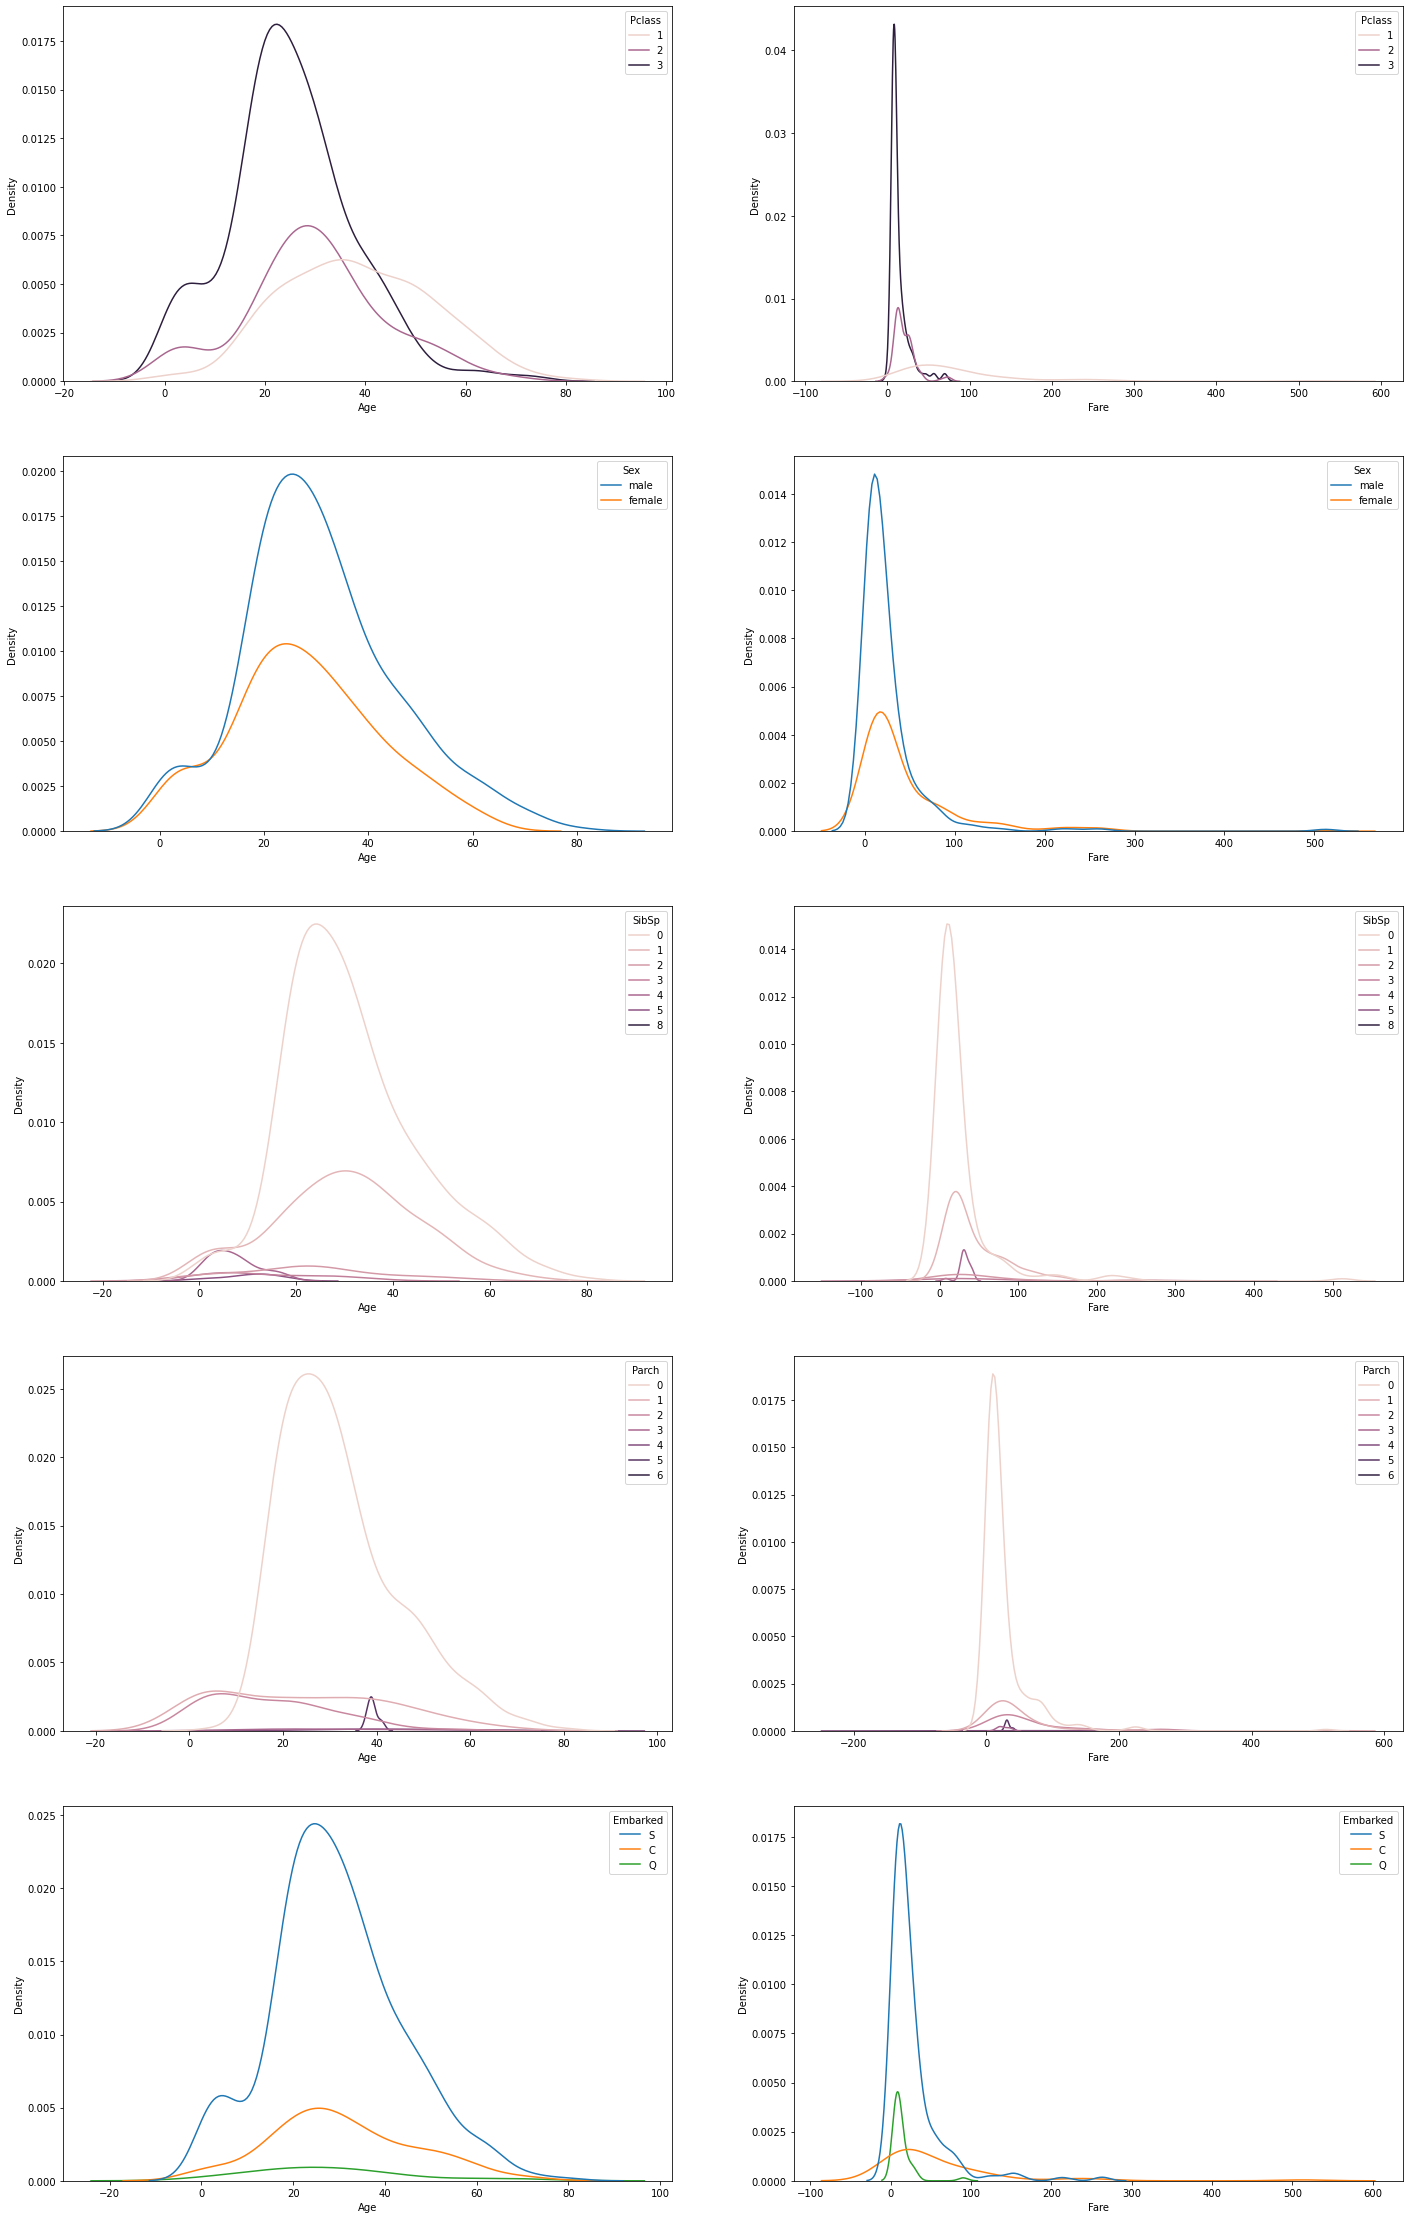

In [20]:
plt.figure(figsize=(24, 40))
plotnumber= 1
for col in cat_cols:
    for ncol in num_cols:
        plt.subplot(5,2, plotnumber)
        sns.kdeplot(x=ncol, hue=col, data=data,color='blue')
        plotnumber+=1

<h3>Pairplot</h3>

<Figure size 1800x1800 with 0 Axes>

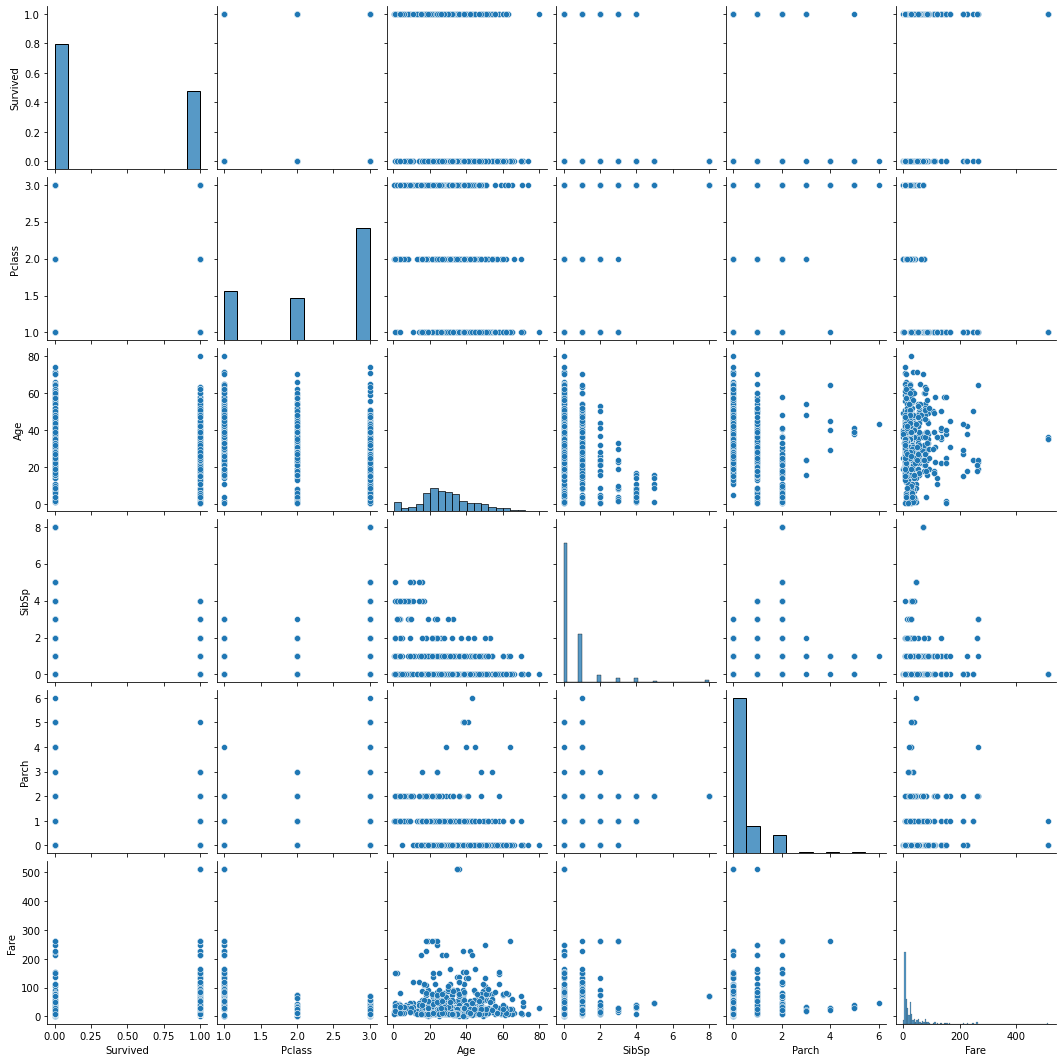

In [22]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

<strong>No multicollinearity probelm can be seen</strong>

<h3>Correlation Matrix</h3>

In [23]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


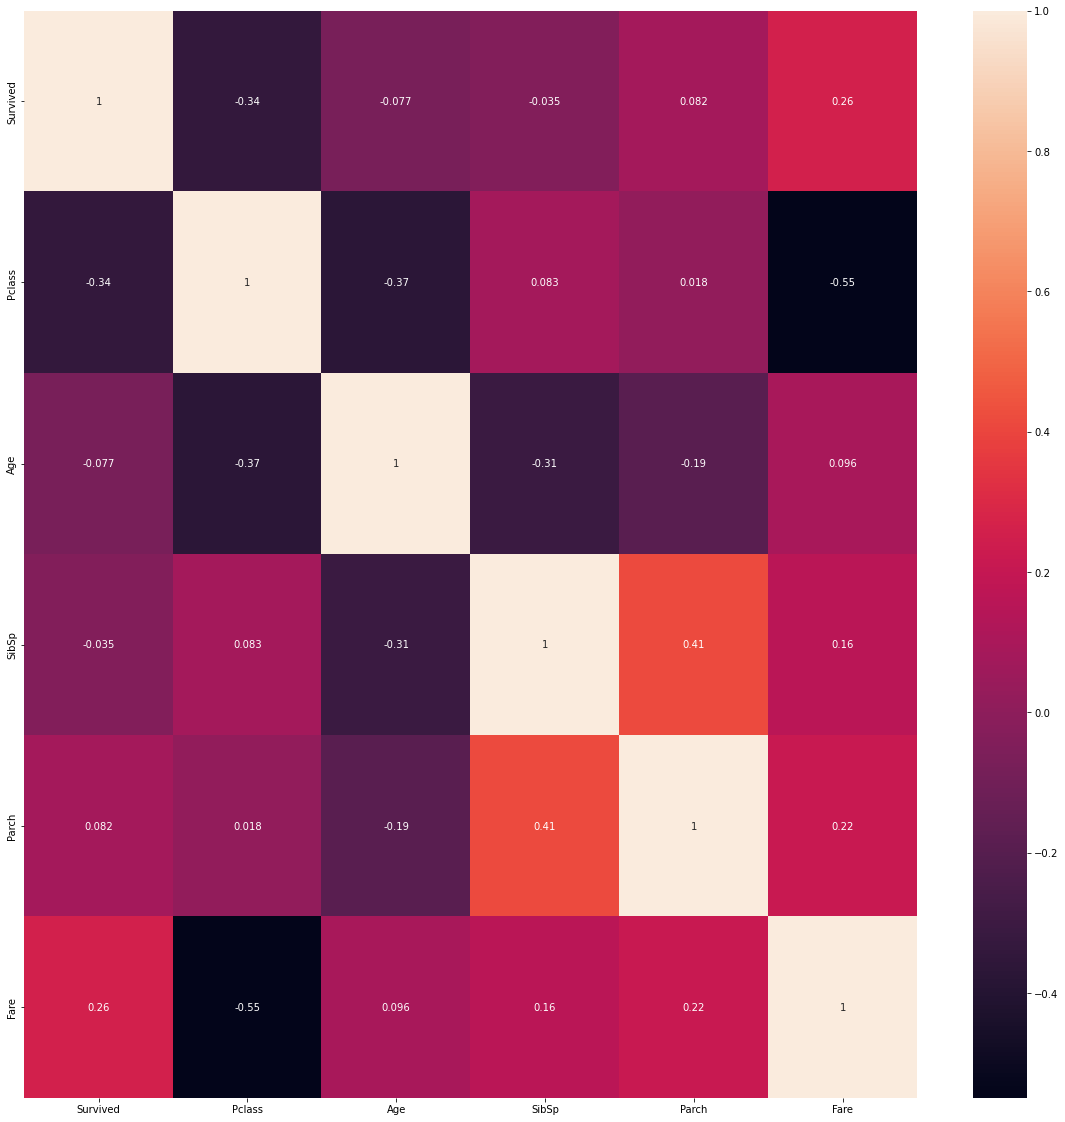

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

<strong>
    <ul>
        <li>Pclass has -34% correlation with Survival</li>
        <li>Age has -7.7% correlation with Survival</li>
        <li>SibSp has -3.5% correlation with Survival</li>
        <li>Parch has 8.2% corrleation with Survival</li>
        <li>Fare has 26% correlation with Survival</li>
        <li>Fare has -55% correlation with Pclass</li>
        <li>Parch has 41% correlation with SibSp</li>
    </ul>
</strong>

<h3>Descriptive Statistics</h3>

In [27]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ul>
    <li>Survived (Outcome)
        <ul>
            <li>Min -: 0</li>
            <li>Max -: 1</li>
        </ul>
    </li>
    <li>Age
        <ul>
            <li>Mean -: 29.6</li>
            <li>STD -: 14.52</li>
            <li>Min -: 0.42</li>
            <li>Max -: 80</li>
        </ul>
    </li>
    <li>Fare
        <ul>
            <li>Mean -: 32.20</li>
            <li>STD -: 49.69</li>
            <li>Min -: 0</li>
            <li>Max -: 512</li>
        </ul>
    </li>
    <li>PClass
        <ul>
            <li>Min -: 1</li>
            <li>Max -: 3</li>
        </ul>
    </li>
    <li>SibSp
        <ul>
            <li>Min -: 0</li>
            <li>Max -: 8</li>
        </ul>
    </li>
    <li>Parch
        <ul>
            <li>Min -: 0</li>
            <li>Max -: 6</li>
        </ul>
    </li>
</ul>

<h3>Dropping null Values</h3>

In [28]:
data = data.dropna()

<h3>Handling Outliers</h3>

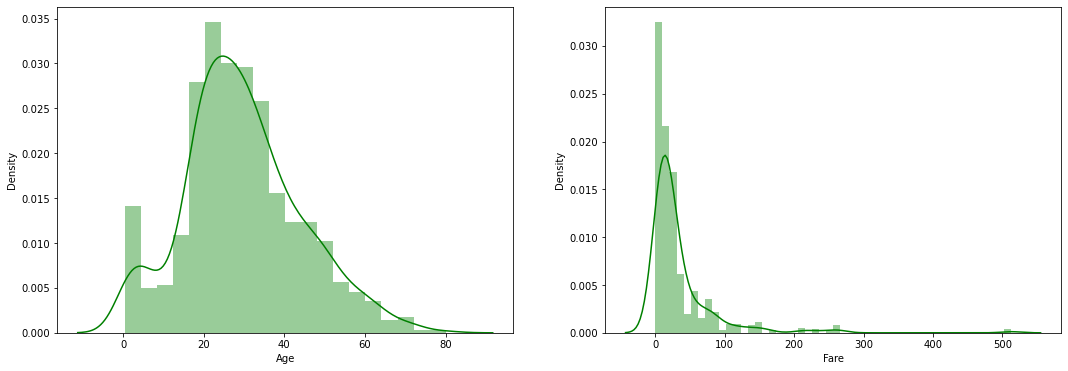

In [29]:
plt.figure(figsize=(18,6))
plotnumber=1
for col in num_cols:
    plt.subplot(1,2,plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

<strong>Age is close to normal, but fare is skewed to right</strong>

<h4>Boxplot</h4>

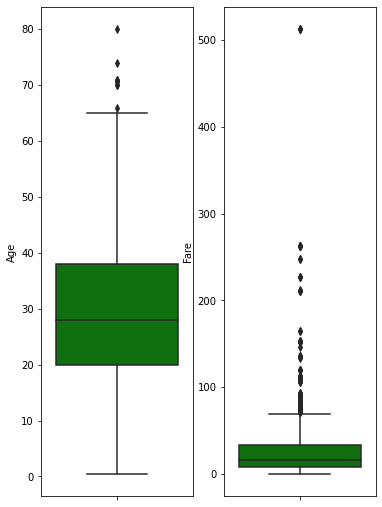

In [34]:
plt.figure(figsize=(6,9))
plotnumber=1
for col in num_cols:
    plt.subplot(1,2,plotnumber)
    sns.boxplot(y=data[col], color='green')
    plotnumber+=1

<strong>Fare has more outliers than age</strong>

In [35]:
data[num_cols].skew()

Age     0.388881
Fare    4.667009
dtype: float64

<h4>Using z_score Technique</h4>

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(data[num_cols]))
print(len(np.where(z>3)[0]))

20


In [37]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

Old Shape (712, 8)
New Shape (692, 8)
Total Dropped Rows 20


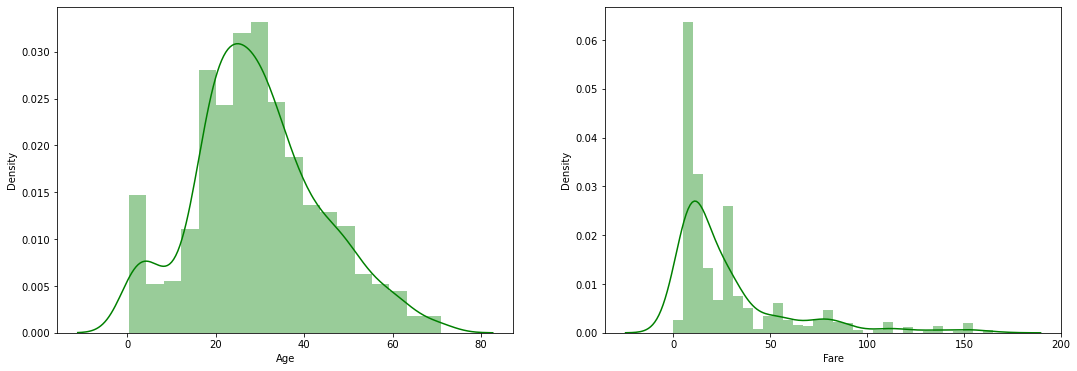

In [39]:
plt.figure(figsize=(18,6))
plotnumber=1
for col in num_cols:
    plt.subplot(1,2,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [41]:
data_new[num_cols].skew()

Age     0.322395
Fare    2.175764
dtype: float64

<strong>Skew has become slighlty less</strong>

<h4>Power Transform</h4>

In [42]:
from sklearn.preprocessing import power_transform

for col in num_cols:
    data_new[col] = power_transform(np.array(data_new[col]).reshape(-1,1), method='yeo-johnson').reshape(692,)

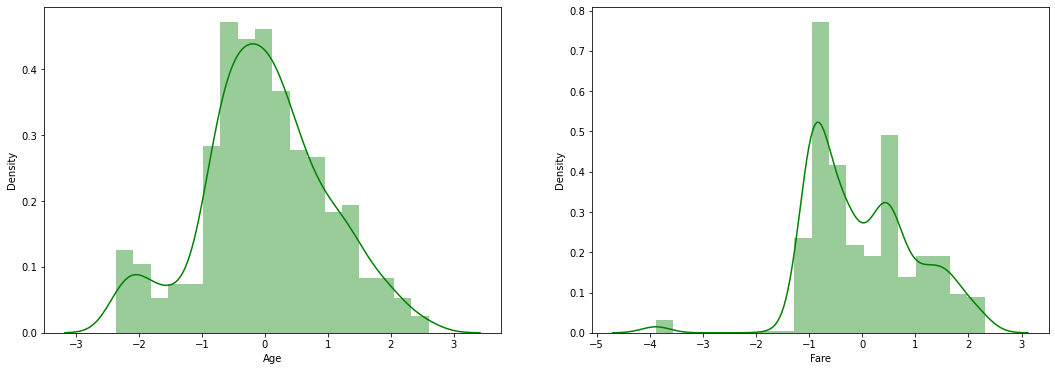

In [43]:
plt.figure(figsize=(18,6))
plotnumber=1
for col in num_cols:
    plt.subplot(1,2,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [44]:
data_new[num_cols].skew()

Age    -0.043530
Fare   -0.020023
dtype: float64

<strong>Skewness is removed now</strong>

<h3>Scaling the dataset</h3>

In [45]:
data_new[num_cols].mean()

Age     5.101892e-17
Fare    7.909537e-17
dtype: float64

<strong>mean is already close to zero so no need of scaling</strong>

<h3>Encoding</h3>

In [46]:
data_cat = pd.get_dummies(data_new[cat_cols])

In [49]:
data_new = data_new.drop(columns=cat_cols)

,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.466785,-1.001043,3,1,0,0,1,0,0,1
1,1,0.623428,1.474266,1,1,0,1,0,1,0,0
2,1,-0.181800,-0.903182,3,0,0,1,0,0,0,1
3,1,0.427988,1.169515,1,1,0,1,0,0,0,1
4,0,0.427988,-0.885942,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,0.687830,0.530445,3,0,5,1,0,0,1,0
886,0,-0.112052,-0.355337,2,0,0,0,1,0,0,1
887,1,-0.687727,0.562440,1,0,0,1,0,0,0,1
889,1,-0.181800,0.562440,1,0,0,0,1,1,0,0


In [50]:
data_new = data_new.join(data_cat)

In [52]:
data_new

,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.466785,-1.001043,3,1,0,0,1,0,0,1
1,1,0.623428,1.474266,1,1,0,1,0,1,0,0
2,1,-0.181800,-0.903182,3,0,0,1,0,0,0,1
3,1,0.427988,1.169515,1,1,0,1,0,0,0,1
4,0,0.427988,-0.885942,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,0.687830,0.530445,3,0,5,1,0,0,1,0
886,0,-0.112052,-0.355337,2,0,0,0,1,0,0,1
887,1,-0.687727,0.562440,1,0,0,1,0,0,0,1
889,1,-0.181800,0.562440,1,0,0,0,1,1,0,0


<h3>Multicollineairty usnig VIF</h3>

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(data_new[num_cols].values, i) for i in range(data_new[num_cols].shape[1])]
vif["Features"] = data_new[num_cols].columns
vif

,vif,Features
0,1.00901,Age
1,1.00901,Fare


<strong>No Mulitollinearity Problem</strong>

<h3>Builidng Models</h3>

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, plot_roc_curve

In [60]:
y = data_new['Survived']
X = data_new.drop(columns=['Survived'])

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<h3>Logistic Regression</h3>

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Training Accuracy :  0.8137432188065099
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       354
           1       0.72      0.78      0.75       199

    accuracy                           0.81       553
   macro avg       0.80      0.81      0.80       553
weighted avg       0.82      0.81      0.82       553


Testing Accuracy : 0.7482014388489209
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.83      0.76      0.80        89
           1       0.63      0.72      0.67        50

    accuracy                           0.75       139
   macro avg       0.73      0.74      0.73       139
weighted avg       0.76      0.75      0.75       139



Text(33.0, 0.5, 'Predicted')

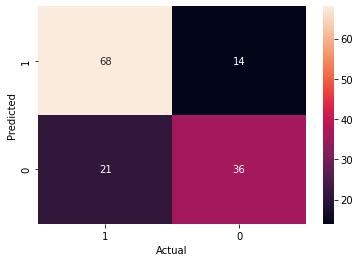

In [68]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [73]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700, 1900, 2100,
       2300, 2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [74]:
grid_lr.best_score_

0.7920681551116333

In [76]:
grid_lr.best_params_

{'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'saga'}

<h4>Building Model with best Params</h4>

In [77]:
grid_lr = LogisticRegression(dual= False,
     fit_intercept=True,
     max_iter=100,
     penalty='l2',
     solver='saga')
print("Cross Val Score" ,cross_val_score(grid_lr, X_train, y_train, cv=4).mean())

Cross Val Score 0.8082838077364196


In [78]:
grid_lr.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [79]:
y_pred_train = grid_lr.predict(X_train)
y_pred_test = grid_lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Training Accuracy :  0.8155515370705244
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       355
           1       0.72      0.79      0.75       198

    accuracy                           0.82       553
   macro avg       0.80      0.81      0.80       553
weighted avg       0.82      0.82      0.82       553


Testing Accuracy : 0.7553956834532374
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        90
           1       0.63      0.73      0.68        49

    accuracy                           0.76       139
   macro avg       0.74      0.75      0.74       139
weighted avg       0.77      0.76      0.76       139



Text(33.0, 0.5, 'Predicted')

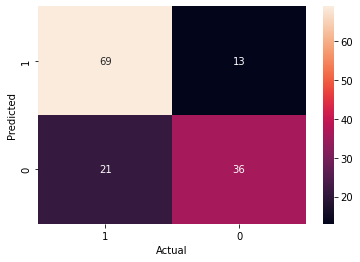

In [80]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

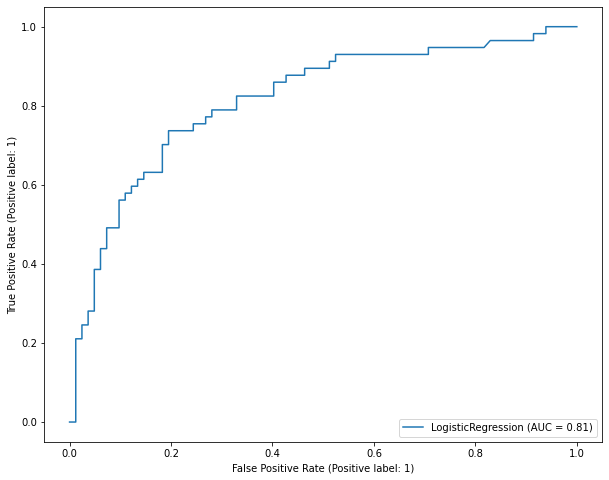

In [91]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(grid_lr, X_test, y_test, ax=ax)

<h3>KNeighborsClassifier</h3>

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8698010849909584
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       351
           1       0.80      0.86      0.83       202

    accuracy                           0.87       553
   macro avg       0.86      0.87      0.86       553
weighted avg       0.87      0.87      0.87       553


Testing Accuracy : 0.7410071942446043
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.85      0.74      0.80        94
           1       0.58      0.73      0.65        45

    accuracy                           0.74       139
   macro avg       0.72      0.74      0.72       139
weighted avg       0.76      0.74      0.75       139



Text(33.0, 0.5, 'Predicted')

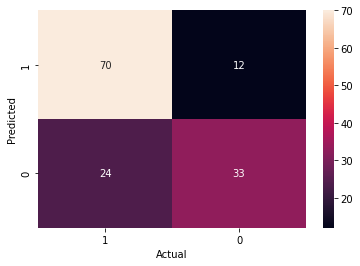

In [93]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Hyperparameter Tuning</h4>

In [101]:
knncv=  KNeighborsClassifier()
grid_param = {
    'n_neighbors':[3,5,7,9,11,13],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[3,5,7,9],
    'p':[1,2,3],
    'n_jobs':[-1]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 5, 7, 9], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [102]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 3,
 'n_jobs': -1,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [103]:
grid_knn.best_score_

0.8372405013709362

<h4>Building Model with best Params</h4>

In [104]:
grid_knn = KNeighborsClassifier(leaf_size=3, n_neighbors=9, p=1, n_jobs=-1)
print("Cross Val Score" ,cross_val_score(grid_knn, X_train, y_train, cv=4).mean())

grid_knn.fit(X_train, y_train)

y_pred_train = grid_knn.predict(X_train)
y_pred_test = grid_knn.predict(X_test)

print("\nTraining Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Cross Val Score 0.8245881555625065
Training Accuracy :  0.8571428571428571
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       358
           1       0.77      0.85      0.81       195

    accuracy                           0.86       553
   macro avg       0.84      0.86      0.85       553
weighted avg       0.86      0.86      0.86       553


Testing Accuracy : 0.7697841726618705
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        98
           1       0.58      0.80      0.67        41

    accuracy                           0.77       139
   macro avg       0.74      0.78      0.75       139
weighted avg       0.81      0.77      0.78       139



Text(33.0, 0.5, 'Predicted')

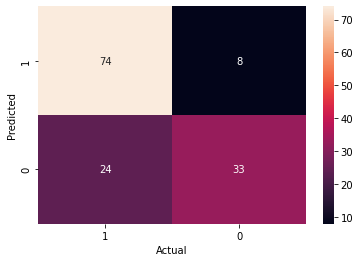

In [105]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

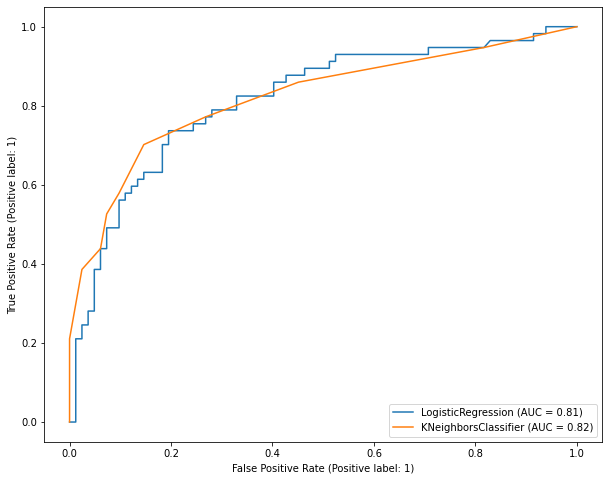

In [106]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(grid_lr, X_test, y_test, ax=ax)
plot_roc_curve(grid_knn, X_test, y_test, ax=ax)

<strong>KNN works better than logistic regression</strong>

<h3>Decision Tree Classifier</h3>

In [107]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9891500904159132
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       343
           1       0.97      1.00      0.99       210

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553


Testing Accuracy : 0.7050359712230215
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75        85
           1       0.61      0.65      0.63        54

    accuracy                           0.71       139
   macro avg       0.69      0.69      0.69       139
weighted avg       0.71      0.71      0.71       139



Text(33.0, 0.5, 'Predicted')

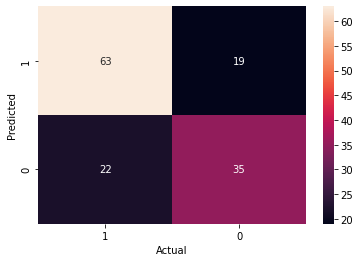

In [108]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Hyperparameter Tuning</h4>

In [116]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[5,6,7,8,9],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5, 6,7],
    'max_leaf_nodes':[10,20,25,30,35,40,45,50]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_leaf_nodes': [10, 20, 25, 30, 35, 40, 45, 50],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [117]:
grid_dt.best_score_

0.8481100665883275

In [118]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

<h4>building model with best Params</h4>

In [119]:
grid_dt = DecisionTreeClassifier(criterion='gini', max_depth=7, max_leaf_nodes=40, min_samples_split=2, min_samples_leaf=4, splitter='random')
print("Cross Val Score" ,cross_val_score(grid_dt, X_train, y_train, cv=4).mean())

grid_dt.fit(X_train, y_train)

y_pred_train = grid_dt.predict(X_train)
y_pred_test = grid_dt.predict(X_test)

print("\nTraining Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Cross Val Score 0.8228026274632467

Training Accuracy :  0.8481012658227848
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.95      0.83      0.88       389
           1       0.69      0.90      0.78       164

    accuracy                           0.85       553
   macro avg       0.82      0.86      0.83       553
weighted avg       0.87      0.85      0.85       553


Testing Accuracy : 0.7482014388489209
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81        99
           1       0.54      0.78      0.64        40

    accuracy                           0.75       139
   macro avg       0.72      0.76      0.72       139
weighted avg       0.79      0.75      0.76       139



Text(33.0, 0.5, 'Predicted')

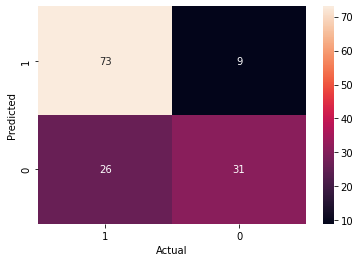

In [120]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

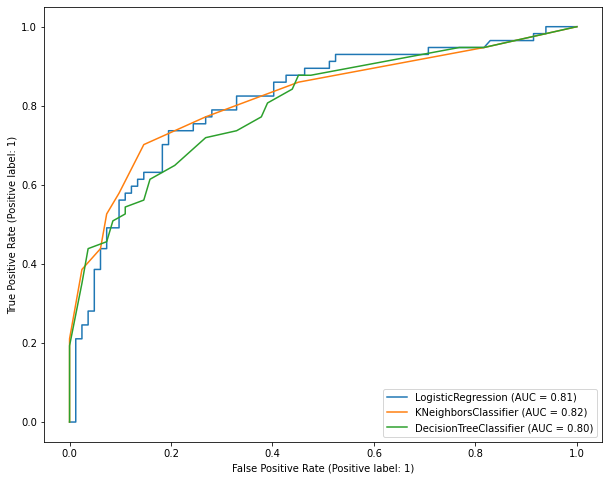

In [121]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(grid_lr, X_test, y_test, ax=ax)
plot_roc_curve(grid_knn, X_test, y_test, ax=ax)
plot_roc_curve(grid_dt, X_test, y_test, ax=ax)

<strong>KNN is still the best performing model</strong>

<h3>Supoport Vector Classifier</h3>

In [122]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Training Accuracy :  0.8444846292947559
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       357
           1       0.75      0.83      0.79       196

    accuracy                           0.84       553
   macro avg       0.83      0.84      0.83       553
weighted avg       0.85      0.84      0.85       553


Testing Accuracy : 0.7482014388489209
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        93
           1       0.60      0.74      0.66        46

    accuracy                           0.75       139
   macro avg       0.73      0.75      0.73       139
weighted avg       0.77      0.75      0.75       139



Text(33.0, 0.5, 'Predicted')

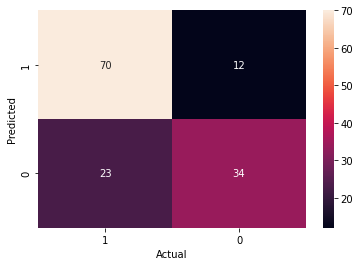

In [123]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Hyperparameter tuning</h4>

In [133]:
svccv = SVC()
grid_param = {
    'C':[1,10,20,50,100,150,200,300,500],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2,3,4,5,6],
    'decision_function_shape':['ovo', 'ovr'],
    'gamma':['scale', 'auto']
}

grid_svc = GridSearchCV(svccv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_svc.fit(X_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 50, 100, 150, 200, 300, 500],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [134]:
grid_svc.best_score_

0.8372405013709362

In [135]:
grid_svc.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf'}

<h4>Building model with best parametersm</h4>

In [136]:
grid_svc = SVC(C=1,decision_function_shape='ovo',degree=1, gamma='scale', kernel='rbf')
print("Cross Val Score" ,cross_val_score(grid_svc, X_train, y_train, cv=4).mean())

grid_svc.fit(X_train, y_train)

y_pred_train = grid_svc.predict(X_train)
y_pred_test = grid_svc.predict(X_test)

print("\nTraining Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Cross Val Score 0.8372171827755187

Training Accuracy :  0.8444846292947559
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       357
           1       0.75      0.83      0.79       196

    accuracy                           0.84       553
   macro avg       0.83      0.84      0.83       553
weighted avg       0.85      0.84      0.85       553


Testing Accuracy : 0.7482014388489209
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        93
           1       0.60      0.74      0.66        46

    accuracy                           0.75       139
   macro avg       0.73      0.75      0.73       139
weighted avg       0.77      0.75      0.75       139



Text(33.0, 0.5, 'Predicted')

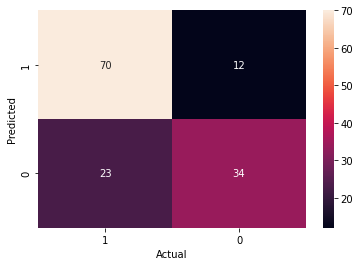

In [137]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

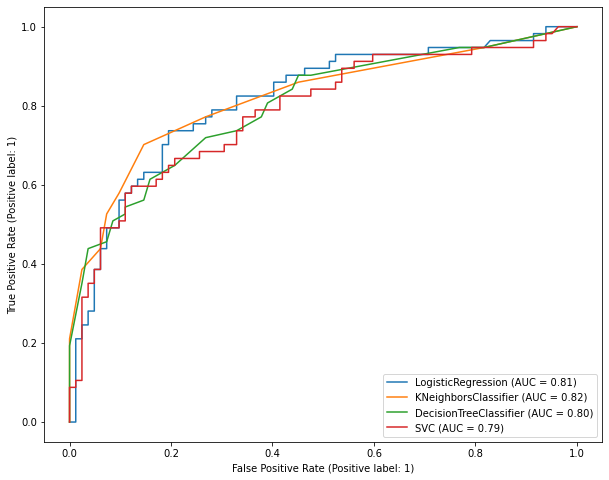

In [138]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(grid_lr, X_test, y_test, ax=ax)
plot_roc_curve(grid_knn, X_test, y_test, ax=ax)
plot_roc_curve(grid_dt, X_test, y_test, ax=ax)
plot_roc_curve(grid_svc, X_test, y_test, ax=ax)

<strong>KNN is still the best performing mdoel</strong>

<h3>Random Forest Classifier</h3>

In [139]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9891500904159132
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.99      0.99      0.99       216

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553


Testing Accuracy : 0.7697841726618705
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        92
           1       0.63      0.77      0.69        47

    accuracy                           0.77       139
   macro avg       0.75      0.77      0.75       139
weighted avg       0.79      0.77      0.77       139



Text(33.0, 0.5, 'Predicted')

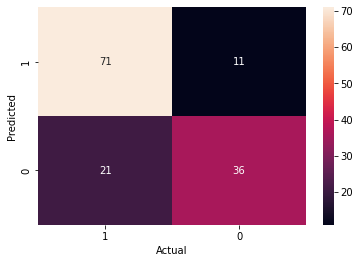

In [140]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Hyperparameter tuning</h4>

In [149]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[10,50,100,200],
    'criterion':['gini', 'entropy'],
    'max_depth':[7,9,10,12],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4,5],
    'max_leaf_nodes':[35,40,45],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 10, 12],
                         'max_leaf_nodes': [35, 40, 45],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 50, 100, 200], 'n_jobs': [-1]},
             verbose=3)

In [150]:
grid_rf.best_score_

0.86072267920094

In [151]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 35,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50,
 'n_jobs': -1}

<h4>Building mdoel with best parameters</h4>

In [152]:
grid_rf = RandomForestClassifier(criterion='gini', max_depth=12, max_leaf_nodes=35, min_samples_leaf=2, min_samples_split=2, n_estimators=50, n_jobs=-1)

print("Cross Val Score" ,cross_val_score(grid_rf, X_train, y_train, cv=4).mean())

grid_rf.fit(X_train, y_train)

y_pred_train = grid_rf.predict(X_train)
y_pred_test = grid_rf.predict(X_test)

print("\nTraining Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Cross Val Score 0.8444374934834742

Training Accuracy :  0.8933092224231465
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       370
           1       0.79      0.93      0.85       183

    accuracy                           0.89       553
   macro avg       0.87      0.90      0.88       553
weighted avg       0.90      0.89      0.90       553


Testing Accuracy : 0.762589928057554
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        99
           1       0.56      0.80      0.66        40

    accuracy                           0.76       139
   macro avg       0.73      0.77      0.74       139
weighted avg       0.80      0.76      0.77       139



Text(33.0, 0.5, 'Predicted')

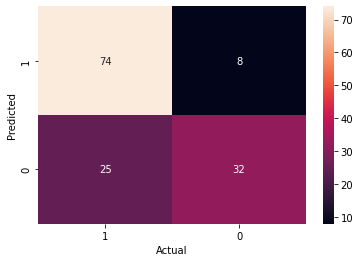

In [153]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

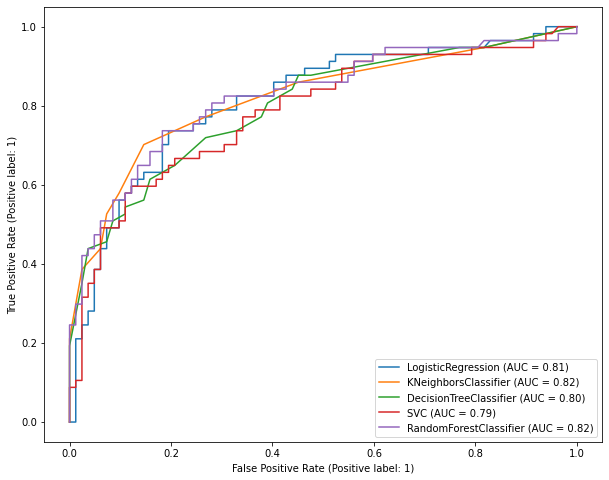

In [154]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(grid_lr, X_test, y_test, ax=ax)
plot_roc_curve(grid_knn, X_test, y_test, ax=ax)
plot_roc_curve(grid_dt, X_test, y_test, ax=ax)
plot_roc_curve(grid_svc, X_test, y_test, ax=ax)
plot_roc_curve(grid_rf, X_test, y_test, ax=ax)

<strong>KNeighbors and RandomForest are close to each other but KNN has slightly higher accuracy</strong>

<h3>XGradBoost Trees</h3>

In [155]:
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(X_train, y_train)
y_pred_train = xg.predict(X_train)
y_pred_test = xg.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

[17:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy :  0.9783001808318263
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       343
           1       0.96      0.99      0.97       210

    accuracy                           0.98       553
   macro avg       0.97      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553


Testing Accuracy : 0.762589928057554
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.75      0.82        97
           1       0.58      0.79      0.67        42

    accuracy                      

Text(33.0, 0.5, 'Predicted')

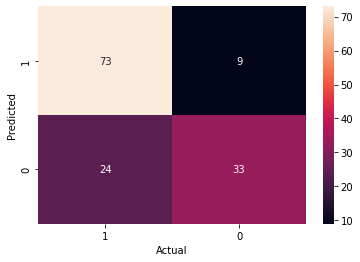

In [156]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>Hyperparameter tuning</h4>

In [163]:
xgcv = XGBClassifier()

grid_param = {
    'n_estimators':[50,100,150,200,250],
    'max_depth':[10,12,13,14,15],
    'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.3,0.5,0.7],
    'n_jobs':[-1]
}

grid_xg = GridSearchCV(xgcv, param_grid=grid_param, cv=3, n_jobs=-1, verbose=3)
grid_xg.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[17:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [164]:
grid_xg.best_score_

0.8354191147669409

In [165]:
grid_xg.best_params_

{'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 100, 'n_jobs': -1}

<h4>Building Model with best params</h4>

In [166]:
grid_xg = XGBClassifier(learning_rate=0.05, max_depth=12, n_estimators=100, n_jobs=-1)
print("Cross Val Score" ,cross_val_score(grid_xg, X_train, y_train, cv=4).mean())

grid_xg.fit(X_train, y_train)

y_pred_train = grid_xg.predict(X_train)
y_pred_test = grid_xg.predict(X_test)

print("\nTraining Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

[17:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Text(33.0, 0.5, 'Predicted')

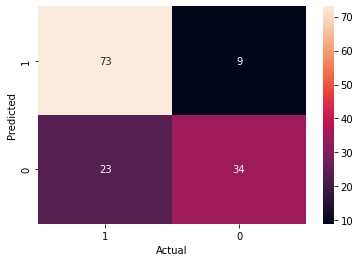

In [167]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0))
plt.xlabel('Actual')
plt.ylabel('Predicted')

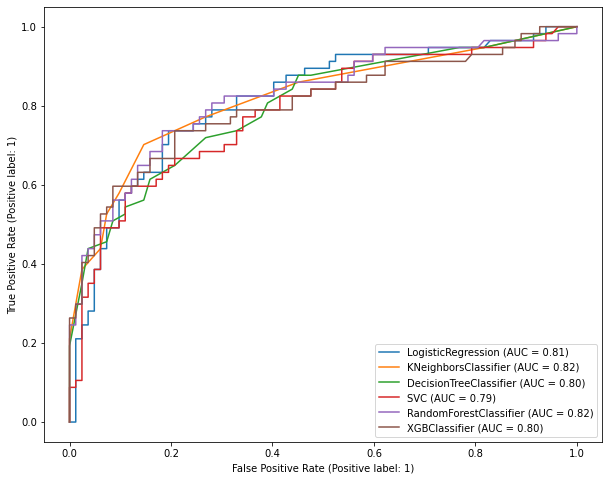

In [168]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(grid_lr, X_test, y_test, ax=ax)
plot_roc_curve(grid_knn, X_test, y_test, ax=ax)
plot_roc_curve(grid_dt, X_test, y_test, ax=ax)
plot_roc_curve(grid_svc, X_test, y_test, ax=ax)
plot_roc_curve(grid_rf, X_test, y_test, ax=ax)
plot_roc_curve(grid_xg, X_test, y_test, ax=ax)

<strong>KNN is the best performing Model</strong>

<h3>Saving model</h3>

<h4>Training on full data to save model</h4>

In [169]:
final_model = KNeighborsClassifier(leaf_size=3, n_neighbors=9, p=1, n_jobs=-1)
final_model.fit(X,y)

KNeighborsClassifier(leaf_size=3, n_jobs=-1, n_neighbors=9, p=1)

In [170]:
import pickle
filename = 'final_model.pickle'
pickle.dump(final_model, open(filename, 'wb'))